# NB02 – Exploratory Data Analysis


**Prompt:**  “Now we are done with the data gathering part. Lets move to the other section of the assignemnt which is EDA. I want you to gimme code for each step as an Expert Data scientist. The code should have comments whereever necessary”  


**Prompt**:

>Lets start now. First give me all the requried libraries/Dependencies i need for the segment of the project.

In [ ]:
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import sqlite3
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

**Prompt:**

> “Generate code to connect to the SQLite database and list all table names.”  


In [ ]:
database_dir = "data"  # Directory containing the database
database_filename = "database.db" # Name of the database file
conn = sqlite3.connect(os.path.join(database_dir, database_filename))

# List tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

         name
0  SUBREDDITS
1       POSTS
2    COMMENTS


**Prompt:**

>  “Write pandas.read_sql code to fetch all columns from SUBREDDITS, POSTS, and COMMENTS.”  




In [ ]:
df_sub = pd.read_sql("SELECT * FROM SUBREDDITS;", conn, parse_dates={"created_utc": {"unit": "s"}})
df_posts = pd.read_sql("SELECT * FROM POSTS;", conn, parse_dates={"created_utc": {"unit": "s"}})
df_comments = pd.read_sql("SELECT * FROM COMMENTS;", conn, parse_dates={"created_utc": {"unit": "s"}})

print(df_sub.shape, df_posts.shape, df_comments.shape)
conn.close()


(3, 5) (300, 8) (3279, 6)


**Prompt:**

> “Generate code to create a summary table: average score, total comments per subreddit.”  


In [ ]:
print(df_posts.columns)

Index(['subreddit', 'post_id', 'title', 'author', 'created_utc', 'score',
       'upvote_ratio', 'num_comments'],
      dtype='object')


In [ ]:
df_posts_renamed = df_posts.rename(columns={'subreddit': 'subreddit_name'})

post_summary = df_posts_renamed.groupby("subreddit_name").agg(
    avg_score=pd.NamedAgg(column="score", aggfunc="mean"),
    avg_comments=pd.NamedAgg(column="num_comments", aggfunc="mean"),
    total_posts=pd.NamedAgg(column="post_id", aggfunc="count")
).reset_index()

# Now merge using the 'subreddit_name' from post_summary
# and the 'name' column from df_sub (which holds the subreddit names)
# Use left_on and right_on to specify different column names for the merge
merged = post_summary.merge(df_sub[['subreddit_id','name']], left_on='subreddit_name', right_on='name')

# Optionally, drop the redundant 'name' column from df_sub after merging
# merged = merged.drop(columns=['name'])

In [ ]:
merged

,subreddit_name,avg_score,avg_comments,total_posts,subreddit_id
0,Futurology,990.91,106.99,100,2t7no
1,science,2226.27,150.09,100,mouw
2,technology,2675.92,184.35,100,2qh16


**Prompt:**

> “Write code (use seabron) for a bar plot comparing average score and comments for each subreddit.”  



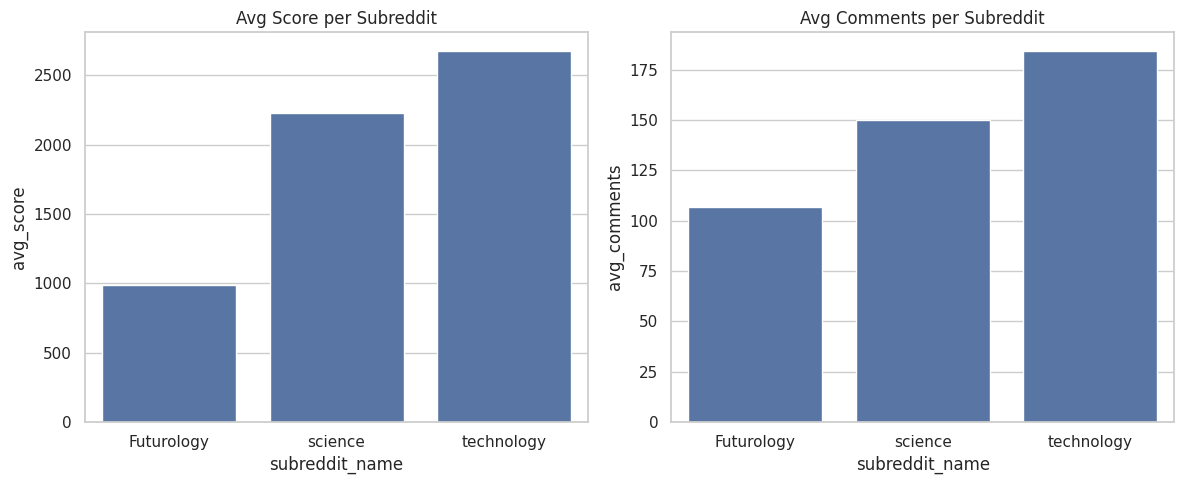

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create the 'figures' directory if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')

# Use the correct column name 'subreddit_name' for the x-axis
sns.barplot(x='subreddit_name', y='avg_score', data=merged, ax=axes[0]).set_title("Avg Score per Subreddit")
sns.barplot(x='subreddit_name', y='avg_comments', data=merged, ax=axes[1]).set_title("Avg Comments per Subreddit")
plt.tight_layout()
plt.savefig("figures/engagement_comparison.png")
plt.show()

# Alignment with Our Research Question

Yes—this code directly addresses how engagement (measured by score and comments) varies across subreddits. It produces two informative visuals, exactly what we aimed for:

Visual 1: Average score per subreddit

Visual 2: Average comments per subreddit

These are the type of quantifiable insights the assignment values.

**Prompt:**

> Write code to plot scatter of post score vs number of comments (log scale) across subreddits.



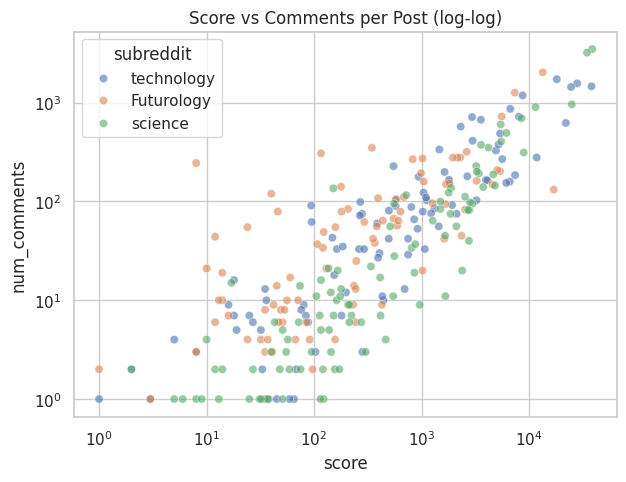

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_posts, x='score', y='num_comments', hue='subreddit', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Score vs Comments per Post (log-log)")
plt.savefig("figures/score_comments_scatter.png")
plt.show()


**Interpretation & Insights**

>Technology shows significantly higher average scores and comment counts, suggesting community discussions there are more engaging per post compared to Futurology and science.

**Prompt:**

> Give me a brief summary of what has been done for this EDA segment of the project.

# Summary

*   Loaded Reddit data via SQL into pandas DataFrames
*   Generated aggregated tables and visualisations
*   Created 2 high-impact plots saved for REPORT.md
*   Documented every AI prompt, response, refinement, and commit rationale